In [ ]:
!git clone https://github.com/broadinstitute/raman_classifier_challenge.git

Cloning into 'raman_classifier_challenge'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 120 (delta 54), reused 55 (delta 20), pack-reused 0
Receiving objects: 100% (120/120), 2.96 MiB | 5.08 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv('raman_classifier_challenge/data/raman_data.csv')

In [ ]:
df.describe()

,631.73,633.93,636.13,638.32,640.52,642.72,644.92,647.11,649.31,651.5,653.7,655.89,658.09,660.28,662.47,664.66,666.86,669.05,671.24,673.43,675.62,677.81,680.0,682.18,684.37,686.56,688.74,690.93,693.11,695.3,697.48,699.67,701.85,704.03,706.22,708.4,710.58,712.76,714.94,717.12,...,3049.65,3051.41,3053.16,3054.91,3056.66,3058.41,3060.16,3061.91,3063.66,3065.41,3067.16,3068.91,3070.66,3072.4,3074.15,3075.9,3077.65,3079.39,3081.14,3082.88,3084.63,3086.37,3088.12,3089.86,3091.6,3093.35,3095.09,3096.83,3098.57,3100.32,3102.06,3103.8,3105.54,3107.28,3109.02,3110.76,3112.5,3114.23,3115.97,3117.71
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1940.956063,1968.706240,1977.238813,1981.670019,1991.424288,1997.399225,2002.357416,1999.489232,2010.427915,2023.615172,2032.416350,2017.543497,1990.065685,1973.643518,2004.627731,2035.544521,2069.530244,2077.030837,2066.984671,2084.069946,2094.933728,2123.020675,2113.393038,2119.500072,2098.162213,2073.090616,2035.842218,2020.233239,2011.169438,2017.981563,2026.037002,2069.528535,2089.281960,2113.481990,2129.415700,2168.368631,2196.811073,2194.649318,2215.661885,2234.982266,...,2147.896804,2145.343606,2123.461206,2123.633338,2144.119720,2186.101850,2229.487202,2257.726475,2294.549688,2323.205282,2340.198613,2313.887009,2267.935348,2263.861977,2230.061137,2200.547328,2134.153304,2119.296780,2081.769921,2033.448702,1981.468180,1948.333709,1947.022829,1897.587493,1861.886727,1814.460946,1830.979173,1822.515796,1815.037009,1797.878053,1779.192881,1773.727025,1802.199274,1826.703854,1829.162527,1808.075658,1801.669249,1793.479464,1780.039404,1783.883073
std,867.076585,874.283658,888.865560,887.177325,895.806435,894.700624,906.719174,908.328855,914.143045,919.862412,919.340873,911.439119,894.169378,886.761031,903.345502,917.793123,932.478221,930.430757,930.795291,946.627015,951.456542,961.374431,950.762092,955.368546,943.781521,927.545644,912.637238,904.367829,897.938304,902.714016,900.649175,921.793795,933.310429,957.761154,971.073503,981.806300,983.514053,976.037237,973.973756,971.924759,...,1091.786245,1077.254811,1062.034314,1037.812169,1047.601710,1071.959392,1099.327449,1116.832377,1127.842056,1151.632947,1160.658011,1156.445196,1139.214614,1132.550658,1120.404535,1106.240242,1078.102806,1062.747945,1049.583776,1032.982991,1017.849095,999.464143,997.818280,975.038965,959.465236,940.014379,944.394480,940.215549,934.636735,928.021821,919.212163,937.913527,962.237548,977.860853,973.684171,963.955245,957.308062,944.127997,926.986470,918.505009
min,248.970360,291.083041,247.111486,216.243698,169.092755,232.685678,216.230526,197.490625,241.811695,281.923535,270.985848,232.329615,289.526545,299.595601,246.797633,178.432137,196.749060,256.584125,233.282738,213.722978,226.713546,261.545663,294.571765,305.049472,297.045930,268.186602,200.384929,224.965606,210.267620,262.990821,256.053116,283.741793,274.945761,243.625491,244.308472,278.783278,328.761258,318.343898,317.499307,269.774777,...,511.457951,547.556042,503.216706,473.088865,439.850396,478.078108,525.125203,562.108954,556.290137,520.177127,535.388120,479.770235,496.147862,489.333436,537.395010,546.842700,523.436882,53

In [ ]:
df.dtypes

condition     object
631.73       float64
633.93       float64
636.13       float64
638.32       float64
              ...   
3110.76      float64
3112.5       float64
3114.23      float64
3115.97      float64
3117.71      float64
Length: 1287, dtype: object

In [ ]:
len(df)

178

In [ ]:
df.head()

,condition,631.73,633.93,636.13,638.32,640.52,642.72,644.92,647.11,649.31,651.5,653.7,655.89,658.09,660.28,662.47,664.66,666.86,669.05,671.24,673.43,675.62,677.81,680.0,682.18,684.37,686.56,688.74,690.93,693.11,695.3,697.48,699.67,701.85,704.03,706.22,708.4,710.58,712.76,714.94,...,3049.65,3051.41,3053.16,3054.91,3056.66,3058.41,3060.16,3061.91,3063.66,3065.41,3067.16,3068.91,3070.66,3072.4,3074.15,3075.9,3077.65,3079.39,3081.14,3082.88,3084.63,3086.37,3088.12,3089.86,3091.6,3093.35,3095.09,3096.83,3098.57,3100.32,3102.06,3103.8,3105.54,3107.28,3109.02,3110.76,3112.5,3114.23,3115.97,3117.71
0,0mM,2722.158679,2649.208896,2608.351753,2581.031418,2627.967401,2745.957278,2756.194004,2769.764151,2741.896434,2744.653264,2777.761487,2822.567540,2792.019507,2892.371100,2779.280197,2895.747154,2862.490426,3038.091817,2992.501606,2976.466696,2906.269729,2895.811155,2893.418614,2922.729602,2896.841565,2882.009715,2849.457869,2959.276127,2938.438730,2906.155921,2888.726460,2931.131920,3059.799122,3013.536918,2975.948542,2950.336692,2976.280188,2973.053678,3001.633513,...,3239.920571,3287.740532,3314.842544,3284.535677,3347.450180,3335.935142,3407.863492,3504.112895,3598.433351,3588.713775,3472.453441,3408.603447,3384.892043,3416.731695,3390.568679,3340.222073,3233.144064,3149.745083,3065.196873,2929.939208,2938.280912,2905.830481,2902.052868,2780.687239,2766.235335,2710.610663,2764.146442,2651.180118,2538.749548,2481.753199,2456.407508,2573.229863,2596.037072,2623.135874,2529.939575,2505.451064,2523.138371,2521.697143,2464.550152,2484.439146
1,0mM,1213.484940,1226.582386,1193.001331,1175.826554,1115.523668,1093.738909,1150.629708,1214.843337,1245.452598,1170.100014,1177.194510,1168.902556,1194.566318,1208.070461,1263.260186,1288.897983,1291.552664,1307.704194,1289.645980,1237.236016,1219.088336,1266.878460,1323.777750,1336.308336,1333.657602,1359.656768,1264.099970,1319.456678,1358.923707,1383.380578,1342.754672,1251.022826,1286.780568,1224.535923,1266.068052,1293.597740,1367.545026,1349.954590,1324.412896,...,1384.959774,1392.005408,1327.206313,1366.505097,1382.583210,1413.272573,1452.012234,1461.806186,1510.267412,1479.666498,1491.858283,1464.226943,1466.885615,1409.912730,1301.223650,1242.003006,1243.270906,1311.731075,1318.122003,1310.896545,1240.772988,1263.123352,1203.222524,1241.224848,1189.160216,1173.269387,1137.310464,1109.408148,1115.947020,1075.370354,1033.575063,988.390968,996.799078,1058.707067,1043.417561,1057.049246,992.978764,990.486003,1022.257014,1072.746374
2,0mM,1474.161006,1489.110367,1490.720338,1511.444599,1479.359377,1432.780666,1409.550327,1458.110461,1483.209333,1444.233488,1425.303121,1430.295279,1439.142540,1486.378287,1538.737096,1575.103759,1613.584358,1579.124982,1614.938326,1576.171036,1614.538234,1666.882106,1735.316566,1726.866729,1654.658355,1598.645059,1589.107131,1619.661491,1666.275658,1648.377937,1643.828700,1659.011374,1682.615003,1703.300588,1651.783254,1697.503313,1695.719760,1788.570790,1848.953603,...,1952.394788,1958.317481,1948.429102,2000.091589,2057.249200,2086.725389,2131.311807,2156.661961,2150.468571,2111.887845,2129.764031,2145.834446,2132.177052,2160.229227,2100.727396,2037.163272,1974.568824,1975.228312,2027.913679,1908.117905,1845.334877,1737.962282,1694.234527,1657.255085,1637.020982,1650.507360,1684.667137,1619.412716,1641.753829,1607.825580,1537.244371,1536.062527,1535.777206,1573.672391,1476.940190,1464.770505,1454.660386,1468.955551,1462.648127,1492.857771
3,0mM,1335.249522,1342.788808,1367.978496,1406.527422,1431.902575,1398.372574,1394.613192,1414.194507,1449.188084,1467.159847,1436.700376,1492.628138,1433.286985,1441.532333,1422.587060,1498.308974,1551.219354,1623.161733,1588.804495,1525.990603,1430.183002,1460.165313,1520.597451,1549.346094,1527.231169,1538.155507,1545.917263,1592.096583,1556.180627,1538.320284,1550.852487,1541.342935,1549.188565,1529.230460,1549.691637,1591.482612,1572.715694,1532.332540,1562.803673,...,1411.340888,1456.724611,1426.304722,1393.979280,1402.6

In [ ]:
# Dataset contains almost equal samples of all class
#df.hist(figsize = (200,200))

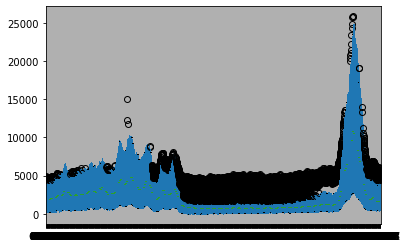

In [ ]:
condition_tmpdf= df.iloc[:,0]
features_tmpdf= df.iloc[:,1:]

features_tmpdf.boxplot()
#filtering corresponding condition values
condition_tmpdf= condition_tmpdf[(np.abs(stats.zscore(features_tmpdf)) < 4).all(axis=1)]

#removing outliers from features 
features_tmpdf= features_tmpdf[(np.abs(stats.zscore(features_tmpdf)) < 4).all(axis=1)]


In [ ]:
mlist=[]
for i in features_tmpdf.columns:
  if float(i) <=1800.0 and float(i) >=800.0:
    mlist.append(i)
print(mlist)
print(len(mlist))

features_tmpdf= features_tmpdf[mlist]
features_tmpdf

['801.71', '803.87', '806.03', '808.18', '810.34', '812.5', '814.65', '816.81', '818.96', '821.12', '823.27', '825.43', '827.58', '829.73', '831.88', '834.03', '836.19', '838.34', '840.49', '842.63', '844.78', '846.93', '849.08', '851.23', '853.37', '855.52', '857.67', '859.81', '861.96', '864.1', '866.24', '868.39', '870.53', '872.67', '874.81', '876.95', '879.09', '881.23', '883.37', '885.51', '887.65', '889.79', '891.93', '894.06', '896.2', '898.34', '900.47', '902.61', '904.74', '906.88', '909.01', '911.14', '913.27', '915.41', '917.54', '919.67', '921.8', '923.93', '926.06', '928.19', '930.32', '932.44', '934.57', '936.7', '938.82', '940.95', '943.08', '945.2', '947.32', '949.45', '951.57', '953.69', '955.82', '957.94', '960.06', '962.18', '964.3', '966.42', '968.54', '970.66', '972.78', '974.9', '977.01', '979.13', '981.25', '983.36', '985.48', '987.59', '989.71', '991.82', '993.93', '996.05', '998.16', '1000.27', '1002.38', '1004.49', '1006.6', '1008.71', '1010.82', '1012.93', '

,801.71,803.87,806.03,808.18,810.34,812.5,814.65,816.81,818.96,821.12,823.27,825.43,827.58,829.73,831.88,834.03,836.19,838.34,840.49,842.63,844.78,846.93,849.08,851.23,853.37,855.52,857.67,859.81,861.96,864.1,866.24,868.39,870.53,872.67,874.81,876.95,879.09,881.23,883.37,885.51,...,1722.93,1724.9,1726.88,1728.85,1730.82,1732.79,1734.76,1736.73,1738.7,1740.67,1742.64,1744.6,1746.57,1748.54,1750.5,1752.47,1754.43,1756.4,1758.36,1760.33,1762.29,1764.26,1766.22,1768.18,1770.14,1772.1,1774.06,1776.03,1777.99,1779.95,1781.9,1783.86,1785.82,1787.78,1789.74,1791.69,1793.65,1795.61,1797.56,1799.52
0,3621.815647,3614.314003,3493.624398,3450.390177,3464.246515,3571.878852,3689.146756,3665.966968,3737.086316,3674.398263,3788.334502,3694.254464,3726.506051,3564.122646,3520.719865,3440.178926,3390.368334,3393.322128,3476.410573,3526.108871,3604.319403,3659.684202,3871.922234,3908.835356,3917.948433,3790.461091,3763.813444,3714.734559,3756.779764,3734.853876,3743.056043,3762.632801,3721.824834,3665.883702,3695.636759,3824.722998,3881.118107,3750.828717,3657.215652,3623.081084,...,1766.047670,1768.105546,1703.374814,1723.307173,1639.774109,1610.668651,1596.913317,1559.557045,1540.678377,1490.500747,1537.833922,1524.764794,1529.488502,1509.483397,1519.085054,1441.138289,1459.344399,1429.600523,1446.682666,1403.671853,1395.997072,1403.368132,1394.920877,1437.191608,1450.088937,1472.073754,1447.050442,1462.236790,1370.992850,1309.499542,1290.349533,1301.662352,1342.178279,1323.333217,1308.082118,1325.325533,1364.193756,1349.753701,1368.585382,1312.478046
1,1784.740028,1808.590202,1803.310714,1755.324403,1730.368075,1804.877108,1877.202202,1896.053550,1899.093549,1894.680986,1892.567214,1838.795646,1860.629894,1879.647252,1895.243901,1863.766459,1858.963570,1862.390283,1885.435292,1823.445761,1788.415506,1753.944600,1757.649365,1836.447043,1850.868318,1854.990116,1728.416546,1713.676017,1723.943570,1722.823545,1778.609392,1817.201877,1801.326288,1770.628077,1709.389494,1789.330461,1751.909212,1753.603484,1731.391537,1714.895029,...,743.659875,762.181961,689.874448,700.455463,666.657811,624.344546,561.239391,575.122522,640.437493,685.166152,653.883260,640.892803,656.608970,660.927841,649.145979,660.755636,661.885868,674.038432,656.297119,633.856842,621.941212,586.030539,535.221542,571.997453,571.192138,614.381120,577.078205,566.540274,496.104306,506.514376,525.944095,541.227509,548.169865,533.896461,540.579402,506.982479,552.524667,553.475794,588.229077,589.062269
2,1746.503576,1866.048124,1813.970214,1846.074530,1809.441948,1844.252596,1875.373623,1952.125858,2017.757470,2050.106239,2042.518051,2081.991538,2048.893968,2061.913626,2005.133211,2062.721983,2073.465756,2112.626314,2073.095288,2095.957487,2093.787366,2179.375614,2236.806177,2330.139914,2387.954089,2429.321074,2361.971461,2333.663979,2380.685779,2382.659087,2363.098742,2295.067231,2287.119920,2227.759105,2194.354745,2256.036099,2364.117570,2334.128439,2303.916765,2214.000174,...,1084.631518,1010.184451,1032.870287,991.798690,970.702144,960.309822,898.647818,879.445591,828.852636,874.862880,916.953577,844.700705,831.639162,771.268443,820.277580,809.186524,846.442537,844.832115,884.426609,814.330816,810.338394,759.462950,827.643905,815.632303,828.456772,793.589168,775.921443,744.911817,755.900558,761.443968,756.185751,772.169019,777.944538,806.594599,762.855774,748.993452,780.433327,758.022588,780.029180,726.233771
3,2194.788515,2217.009616,2142.108522,2095.556022,2084.006925,2088.269898,2212.693677,2247.891204,2178.699783,2059.339737,1998.122073,2093.924197,2114.652987,2127.038728,2022.015162,1993.794608,1937.085572,1944.893813,1922.007065,1902.606087,1943.889945,1907.843213,1900.802165,1923.053727,1998.374260,2081.866819,2032.276826,2001.706935,1946.308096,1908.029014,1884.447406,1883.039971,1890.720614,1884.811464,1888.143215,1949.687533,2013.866396,1954.483369,1969.818252,1926.075572,...,805.412046,821.972041,764.806407,776.605815,685.621189,683.259902,622.423075,616.501280,639.45681

#### I was trying averaging the features, didnt work

In [ ]:
# mlist=[[] for i in range(40)]
# for i in features_tmpdf.columns:
#   ind= (int(float(i)/100))
#   mlist[ind].append(i)
# #mlist
# f_tmpdf= pd.DataFrame()
# for i in mlist:
#   if i:
#     colname= str(int(float(i[0])/100))
#     ar= features_tmpdf[i].mean(axis=1)
#     features_tmpdf= features_tmpdf.drop(features_tmpdf[i], axis=1)
#     f_tmpdf[colname] = ar

# features_tmpdf= f_tmpdf
# features_tmpdf.head()


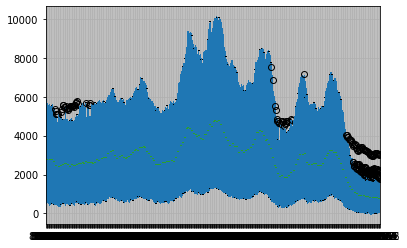

In [ ]:
#features with pretty much outliers removed
features_tmpdf.boxplot()

In [ ]:
tmerg= pd.concat([condition_tmpdf, features_tmpdf], axis=1)
tmerg

,condition,801.71,803.87,806.03,808.18,810.34,812.5,814.65,816.81,818.96,821.12,823.27,825.43,827.58,829.73,831.88,834.03,836.19,838.34,840.49,842.63,844.78,846.93,849.08,851.23,853.37,855.52,857.67,859.81,861.96,864.1,866.24,868.39,870.53,872.67,874.81,876.95,879.09,881.23,883.37,...,1722.93,1724.9,1726.88,1728.85,1730.82,1732.79,1734.76,1736.73,1738.7,1740.67,1742.64,1744.6,1746.57,1748.54,1750.5,1752.47,1754.43,1756.4,1758.36,1760.33,1762.29,1764.26,1766.22,1768.18,1770.14,1772.1,1774.06,1776.03,1777.99,1779.95,1781.9,1783.86,1785.82,1787.78,1789.74,1791.69,1793.65,1795.61,1797.56,1799.52
0,0mM,3621.815647,3614.314003,3493.624398,3450.390177,3464.246515,3571.878852,3689.146756,3665.966968,3737.086316,3674.398263,3788.334502,3694.254464,3726.506051,3564.122646,3520.719865,3440.178926,3390.368334,3393.322128,3476.410573,3526.108871,3604.319403,3659.684202,3871.922234,3908.835356,3917.948433,3790.461091,3763.813444,3714.734559,3756.779764,3734.853876,3743.056043,3762.632801,3721.824834,3665.883702,3695.636759,3824.722998,3881.118107,3750.828717,3657.215652,...,1766.047670,1768.105546,1703.374814,1723.307173,1639.774109,1610.668651,1596.913317,1559.557045,1540.678377,1490.500747,1537.833922,1524.764794,1529.488502,1509.483397,1519.085054,1441.138289,1459.344399,1429.600523,1446.682666,1403.671853,1395.997072,1403.368132,1394.920877,1437.191608,1450.088937,1472.073754,1447.050442,1462.236790,1370.992850,1309.499542,1290.349533,1301.662352,1342.178279,1323.333217,1308.082118,1325.325533,1364.193756,1349.753701,1368.585382,1312.478046
1,0mM,1784.740028,1808.590202,1803.310714,1755.324403,1730.368075,1804.877108,1877.202202,1896.053550,1899.093549,1894.680986,1892.567214,1838.795646,1860.629894,1879.647252,1895.243901,1863.766459,1858.963570,1862.390283,1885.435292,1823.445761,1788.415506,1753.944600,1757.649365,1836.447043,1850.868318,1854.990116,1728.416546,1713.676017,1723.943570,1722.823545,1778.609392,1817.201877,1801.326288,1770.628077,1709.389494,1789.330461,1751.909212,1753.603484,1731.391537,...,743.659875,762.181961,689.874448,700.455463,666.657811,624.344546,561.239391,575.122522,640.437493,685.166152,653.883260,640.892803,656.608970,660.927841,649.145979,660.755636,661.885868,674.038432,656.297119,633.856842,621.941212,586.030539,535.221542,571.997453,571.192138,614.381120,577.078205,566.540274,496.104306,506.514376,525.944095,541.227509,548.169865,533.896461,540.579402,506.982479,552.524667,553.475794,588.229077,589.062269
2,0mM,1746.503576,1866.048124,1813.970214,1846.074530,1809.441948,1844.252596,1875.373623,1952.125858,2017.757470,2050.106239,2042.518051,2081.991538,2048.893968,2061.913626,2005.133211,2062.721983,2073.465756,2112.626314,2073.095288,2095.957487,2093.787366,2179.375614,2236.806177,2330.139914,2387.954089,2429.321074,2361.971461,2333.663979,2380.685779,2382.659087,2363.098742,2295.067231,2287.119920,2227.759105,2194.354745,2256.036099,2364.117570,2334.128439,2303.916765,...,1084.631518,1010.184451,1032.870287,991.798690,970.702144,960.309822,898.647818,879.445591,828.852636,874.862880,916.953577,844.700705,831.639162,771.268443,820.277580,809.186524,846.442537,844.832115,884.426609,814.330816,810.338394,759.462950,827.643905,815.632303,828.456772,793.589168,775.921443,744.911817,755.900558,761.443968,756.185751,772.169019,777.944538,806.594599,762.855774,748.993452,780.433327,758.022588,780.029180,726.233771
3,0mM,2194.788515,2217.009616,2142.108522,2095.556022,2084.006925,2088.269898,2212.693677,2247.891204,2178.699783,2059.339737,1998.122073,2093.924197,2114.652987,2127.038728,2022.015162,1993.794608,1937.085572,1944.893813,1922.007065,1902.606087,1943.889945,1907.843213,1900.802165,1923.053727,1998.374260,2081.866819,2032.276826,2001.706935,1946.308096,1908.029014,1884.447406,1883.039971,1890.720614,1884.811464,1888.143215,1949.687533,2013.866396,1954.483369,1969.818252,...,805.412046,821.972041,764.806407,776.605815,685.621189,683.259902,622.423075,616.501280,639.456812,656.339915,683.392107,590.3

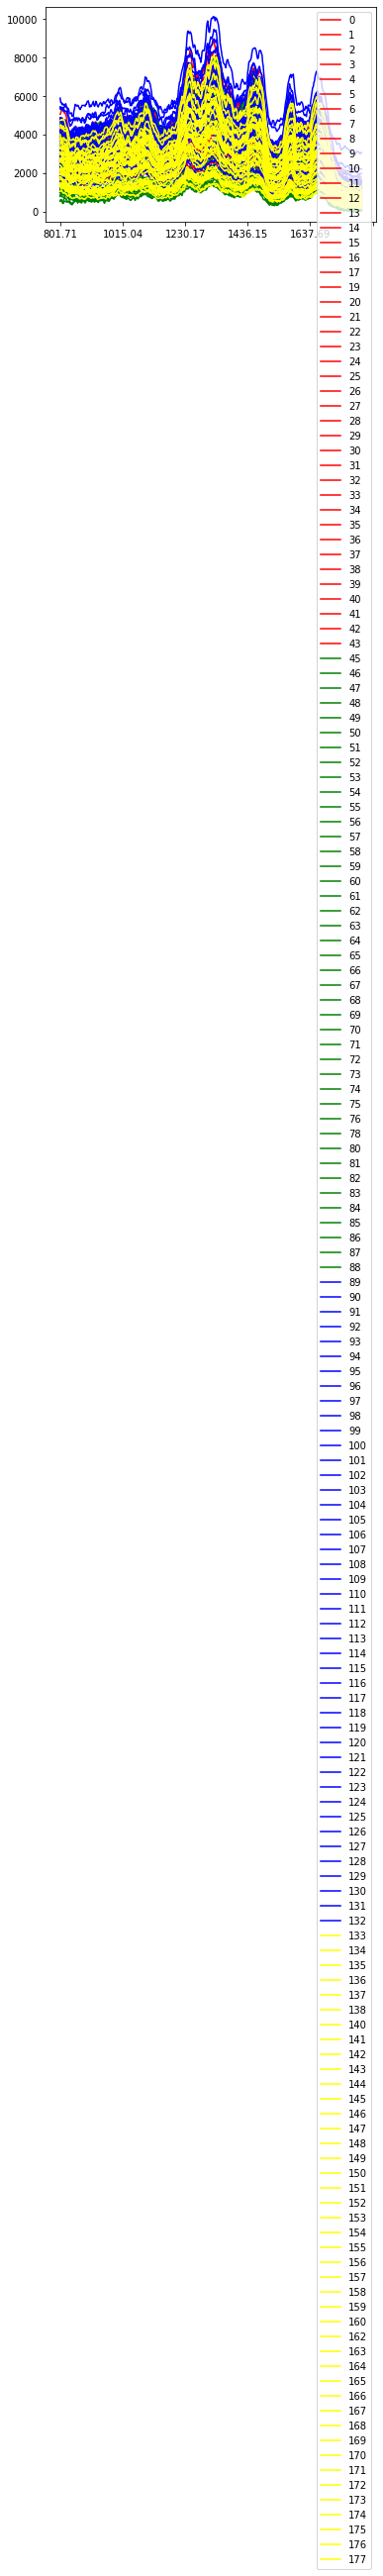

In [ ]:
#I was hoping each concencetration would have different area for spectrometry reading but it was not so.

cdf= condition_tmpdf.copy()
cdf= cdf.replace('0mM', 'red')
cdf= cdf.replace('0.1mM', 'green')
cdf= cdf.replace('0.5mM', 'blue')
cdf= cdf.replace('1mM', 'yellow')

features_tmpdf.T.iloc[:,:].plot(color=cdf)

## scale features

In [ ]:
from sklearn import  preprocessing

x = features_tmpdf.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_features_tmpdf= pd.DataFrame(x_scaled)
scaled_features_tmpdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482
0,0.575234,0.592580,0.572222,0.580774,0.584211,0.612643,0.635620,0.623677,0.634909,0.619506,0.662069,0.651006,0.664523,0.629349,0.636209,0.641460,0.636141,0.633114,0.649916,0.688951,0.700516,0.712584,0.716342,0.700592,0.672046,0.640488,0.649162,0.639806,0.651600,0.644367,0.660660,0.665625,0.670241,0.647722,0.652455,0.661836,0.670700,0.643438,0.624899,0.622700,...,0.483460,0.482275,0.466408,0.468664,0.449950,0.465041,0.478058,0.475191,0.456927,0.438719,0.459670,0.448583,0.440675,0.429666,0.440682,0.420770,0.437064,0.431081,0.437957,0.431784,0.431313,0.435253,0.431100,0.458326,0.472813,0.491769,0.480893,0.491196,0.456904,0.436207,0.417475,0.417281,0.419060,0.420642,0.415437,0.424031,0.431941,0.434558,0.435330,0.418373
1,0.231854,0.235756,0.240601,0.243933,0.248621,0.268754,0.273740,0.270167,0.267948,0.269309,0.279180,0.272670,0.279722,0.282382,0.292892,0.300084,0.308615,0.307432,0.315045,0.318862,0.303460,0.288267,0.268485,0.270852,0.261607,0.248346,0.236738,0.234005,0.251490,0.241996,0.257525,0.263432,0.270831,0.261582,0.253280,0.255603,0.243056,0.242264,0.237587,0.243979,...,0.176249,0.184945,0.169803,0.170501,0.164260,0.164873,0.154106,0.161140,0.173049,0.187584,0.186969,0.180086,0.179399,0.177329,0.172079,0.179348,0.190607,0.198482,0.192517,0.189426,0.187168,0.171448,0.154554,0.179783,0.186298,0.210050,0.196829,0.190462,0.160392,0.164369,0.161153,0.167396,0.161128,0.165574,0.166441,0.154866,0.162263,0.162058,0.173156,0.179598
2,0.224707,0.247110,0.242692,0.261967,0.263926,0.276417,0.273375,0.281366,0.291639,0.299892,0.309466,0.322258,0.318548,0.319925,0.316102,0.343169,0.354491,0.360666,0.354544,0.378095,0.370231,0.382990,0.369982,0.373226,0.368251,0.364710,0.365113,0.359734,0.380752,0.373952,0.377471,0.362224,0.371863,0.354718,0.350743,0.348750,0.366016,0.358872,0.352730,0.343037,...,0.278705,0.258250,0.270182,0.255428,0.253523,0.267118,0.259645,0.258225,0.232463,0.246739,0.268126,0.241998,0.231790,0.210141,0.224917,0.225267,0.247645,0.251061,0.263359,0.246244,0.246591,0.227425,0.248620,0.258220,0.270165,0.268913,0.261756,0.250351,0.248440,0.250671,0.238358,0.243285,0.235770,0.253683,0.238552,0.234467,0.237986,0.232057,0.237595,0.224874
3,0.308499,0.316462,0.307069,0.311544,0.317067,0.323907,0.340744,0.340441,0.323772,0.301709,0.300499,0.324692,0.332109,0.333340,0.319667,0.328242,0.325323,0.324983,0.322743,0.336068,0.337456,0.322533,0.298808,0.288811,0.290896,0.294313,0.298308,0.292415,0.295257,0.279034,0.279244,0.277043,0.289423,0.284846,0.289204,0.287608,0.295669,0.282614,0.285538,0.285892,...,0.194804,0.202618,0.191732,0.192699,0.169828,0.182803,0.173244,0.174341,0.172740,0.178595,0.196072,0.164741,0.158250,0.150719,0.178169,0.190425,0.198722,0.196392,0.190968,0.184036,0.176780,0.158103,0.162474,0.182096,0.199718,0.203288,0.200713,0.189195,0.181357,0.198741,0.195015,0.197098,0.175626,0.183712,0.178821,0.159502,0.148485,0.146424,0.177403,0.191139
4,0.271418,0.275696,0.276123,0.301989,0.320529,0.317970,0.287472,0.284125,0.298010,0.311508,0.322738,0.312250,0.326313,0.313554,0.320991,0.328388,0.347562,0.333832,0.330558,0.341603,0.338927,0.345523,0.323748,0.310747,0.300278,0.293715,0.309080,0.306764,0.314656,0.295824,0.277798,0.272398,0.271262,0.258485,0.262624,0.269587,0.287338,0.279749,0.263321,0.261267,...,0.209860,0.197397,0.194526,0.186045,0.192751,0.206958,0.216757,0.202352,0.178608,0.177981,0.199518,0.219529,0.205595,0.194812,0.186655,0.185144,0.202313,0.195606,0.201512,0.196649,0.197746,0.182655,0.174007,0.181943,0.192987,0.218999,0.228647,0.217924,0.197174,0.193687,0.188654,0.181971,0.166938,0.173187,0.176368,0.173839,0.173104,0.170088,0.181179,0.173601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Encode Classes

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

x= condition_tmpdf.values

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(x)
print(integer_encoded[:5])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded[:5])

onehot_condition_tmpdf= onehot_encoded

[2 2 2 2 2]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [ ]:
# verifying if both are same length
print(len(onehot_condition_tmpdf))
print(len(scaled_features_tmpdf))

172
172


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(features_tmpdf)
chi_selector = SelectKBest(chi2, k=30)
chi_selector.fit(X_norm, integer_encoded)

chi_support = chi_selector.get_support()
chi_feature = features_tmpdf.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi2_features_tmpdf= features_tmpdf.loc[:, chi_support]


30 selected features


## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(scaled_features_tmpdf)
principalDf = pd.DataFrame(data = principalComponents)

print(principalDf.head())

print(len(condition_tmpdf))

# finalDf = pd.concat([principalDf, condition_tmpdf], axis = 1)
finalDf= principalDf.copy()
finalDf['condition']= condition_tmpdf
print(finalDf.head())




         0         1         2   ...        27        28        29
0  6.107470  0.184609 -0.664171  ...  0.024310 -0.003837  0.028517
1 -3.833638  0.357150 -0.316364  ... -0.021104  0.033769  0.012420
2 -0.962749  0.154978 -0.583546  ... -0.041941 -0.033737 -0.028902
3 -3.061011  0.126541 -0.135734  ... -0.015967  0.016264  0.026036
4 -3.297466  0.360307 -0.289941  ...  0.034035  0.030214 -0.049544

[5 rows x 30 columns]
172
          0         1         2  ...        28        29  condition
0  6.107470  0.184609 -0.664171  ... -0.003837  0.028517        0mM
1 -3.833638  0.357150 -0.316364  ...  0.033769  0.012420        0mM
2 -0.962749  0.154978 -0.583546  ... -0.033737 -0.028902        0mM
3 -3.061011  0.126541 -0.135734  ...  0.016264  0.026036        0mM
4 -3.297466  0.360307 -0.289941  ...  0.030214 -0.049544        0mM

[5 rows x 31 columns]


#### Let's see first what amount of variance does each PC explain.



In [ ]:
print(pca.explained_variance_ratio_)



[9.73057808e-01 1.40284746e-02 5.39089820e-03 2.65124177e-03
 5.72670816e-04 5.39182198e-04 3.13814557e-04 2.79701630e-04
 1.67718174e-04 1.46426297e-04 1.18241225e-04 7.92713932e-05
 7.52708128e-05 7.12604349e-05 6.69017872e-05 6.30650684e-05
 6.24295790e-05 5.78444246e-05 5.55823682e-05 5.35594823e-05
 5.04920183e-05 4.95024049e-05 4.81314320e-05 4.65074619e-05
 4.48808631e-05 4.44313956e-05 4.35977997e-05 4.18328060e-05
 4.12126139e-05 4.05798026e-05]


PC1 explains 97.3% and PC2 1.4%. Together, if we keep PC1 and PC2 only, they explain 98.7%. Now lets look at the important features.

In [ ]:
print(abs( pca.components_ ))

#Selecting PC1
yaxis= pca.components_[0]

from collections import OrderedDict 

od = OrderedDict() 

for i in range(len(yaxis)):
  od[i]= yaxis[i]
od2= OrderedDict(sorted(od.items(), key=lambda t: t[1], reverse=True))

[[0.04295346 0.04492502 0.04503862 ... 0.02696454 0.02666117 0.02636576]
 [0.00602869 0.00525944 0.00503539 ... 0.10701846 0.10732679 0.1059749 ]
 [0.05794057 0.05215212 0.05547677 ... 0.06840608 0.05803899 0.05760987]
 ...
 [0.00492435 0.06188536 0.03353942 ... 0.0097584  0.05881125 0.03752341]
 [0.07146529 0.11701425 0.12330788 ... 0.01272512 0.00730979 0.04012492]
 [0.0687908  0.06760707 0.04240146 ... 0.00374447 0.00752928 0.02198048]]


#### The ordered dict below contains all the features sorted in order of their importance, like feature 299th (feature indexing starts from 0) has the most importance.

In [ ]:
print(od2)

OrderedDict([(299, 0.05162021657194792), (91, 0.05144403705833043), (305, 0.0511768005036042), (298, 0.05089037824684153), (303, 0.050817185595302405), (90, 0.05072163934782188), (92, 0.05062071712821579), (304, 0.05056757442726357), (297, 0.050548866154211294), (301, 0.05051455359966579), (300, 0.05036370495920045), (306, 0.05027643842161291), (295, 0.05024839823586373), (296, 0.050208433212625844), (390, 0.05017294484474212), (288, 0.050050348459236366), (135, 0.050008686504277845), (289, 0.04991987546815568), (287, 0.04988393360091854), (188, 0.049777175190676946), (307, 0.04975433938018632), (294, 0.04975405494795377), (89, 0.049739236581893304), (87, 0.04969576089697068), (149, 0.04966965588385209), (88, 0.04965775988625494), (151, 0.04963672158744206), (302, 0.049599692179513856), (93, 0.04954861161880926), (258, 0.0495292477105928), (133, 0.049487543458796315), (285, 0.04941456223288836), (134, 0.049376926965144494), (283, 0.04933381876381436), (95, 0.049316264065321205), (127, 

Here, pca.components_ has shape [n_components, n_features]. Thus, by looking at the PC1 (First Principal Component) which is the first row: [0.04295346 0.04492502 0.04503862 ... 0.02696454 0.02666117 0.02636576] we can conclude that feature 299, 91 and 305 are the most important.

In [ ]:
#Selecting PC2
yaxis= pca.components_[1]
od = OrderedDict() 

for i in range(len(yaxis)):
  od[i]= yaxis[i]
od2= OrderedDict(sorted(od.items(), key=lambda t: t[1], reverse=True))
print(od2)

OrderedDict([(481, 0.10732678738883344), (480, 0.1070184610052658), (482, 0.1059748966020225), (471, 0.10326087354392689), (479, 0.10280768082496686), (472, 0.10232292966378638), (469, 0.10216873561351517), (470, 0.10201965697510826), (473, 0.10173011583307064), (468, 0.10132092623621428), (476, 0.10068560864587899), (478, 0.10067670466541342), (475, 0.10034398059463498), (477, 0.09993174042717798), (467, 0.09955425348077498), (474, 0.09936849173849607), (459, 0.09867855347578204), (460, 0.09859022714052233), (458, 0.09840799659356464), (462, 0.0982129344340609), (461, 0.09782646393048544), (463, 0.09712242918336526), (464, 0.09649966597874379), (466, 0.09576625220108038), (465, 0.09520602749262878), (457, 0.0952025498469264), (450, 0.09357358442412436), (456, 0.09318064267960514), (455, 0.09300031527318346), (451, 0.09276833502075849), (454, 0.0920168965254636), (452, 0.08979769209704724), (449, 0.08852819204322847), (453, 0.0882904473017713), (448, 0.08353299384928725), (447, 0.07954

##### Similarly for PC2, feature at 481, 482, 480th column have the most importance

In [ ]:
len(principalDf)

172

### Creating a features dictionary so it will be easy to traverse features when training a model.

In [ ]:
featuredict={
    'pca':{
        'X':principalDf
    },
    'chi2':{
        'X':chi2_features_tmpdf
    }
}

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

#### As the number of rows are less, I only took 10% of them for the test set and 90% for train set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features_tmpdf, onehot_condition_tmpdf, test_size=0.1, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_features_tmpdf, integer_encoded, test_size=0.1, random_state=42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(principalDf, integer_encoded, test_size=0.1, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(principalDf, onehot_condition_tmpdf, test_size=0.1, random_state=42)

## SVM
achieved 66% accuracy

In [ ]:
featuredict['chi2']['X']

,868.39,891.93,894.06,896.2,936.7,938.82,940.95,943.08,945.2,947.32,972.78,974.9,977.01,981.25,983.36,989.71,993.93,996.05,998.16,1000.27,1002.38,1004.49,1021.36,1023.47,1025.57,1123.22,1127.44,1129.54,1133.76,1169.51
0,3762.632801,3948.189290,3966.494024,4003.019840,4321.667015,4355.975285,4277.341861,4227.410336,4166.462850,4147.171125,4232.414495,4336.122986,4303.105384,4293.195655,4387.570547,4642.210912,5010.520875,5012.899528,5116.640393,5179.472160,5141.259333,5008.330230,4516.742314,4565.920099,4518.973273,4985.688018,4984.338217,4837.150821,4513.642784,4077.737361
1,1817.201877,1896.249020,1901.087360,1897.604285,1966.689197,1980.619822,1978.822018,1955.429955,1887.130411,1909.093293,1875.092353,1960.173758,2037.758983,1984.872781,1977.082880,2120.594737,2276.191171,2281.835648,2316.701699,2327.715992,2352.279496,2332.450286,1992.972978,2088.875899,2114.356862,2310.928421,2283.266900,2334.304371,2240.807043,1785.104709
2,2295.067231,2516.710171,2445.476139,2498.261997,2692.836885,2705.145064,2671.414343,2625.827540,2554.655567,2582.488644,2695.492076,2730.433392,2707.207417,2746.115189,2858.421180,2905.387981,3073.215022,3133.446810,3183.751223,3202.693644,3244.836308,3237.550239,2601.282503,2706.035987,2778.989595,3113.571130,3121.934495,3078.652108,2954.921427,2455.257921
3,1883.039971,2136.137678,2017.503564,2004.036602,2164.894942,2230.672384,2150.748447,2109.340433,2143.300628,2202.558897,2109.786434,2187.303139,2209.075153,2168.765239,2186.956204,2338.712471,2493.833301,2530.283771,2638.671809,2741.172162,2709.208231,2610.527989,2191.054459,2200.956316,2173.619999,2307.338719,2219.026915,2155.857606,2031.810696,1832.731191
4,1860.570725,2042.776144,2028.519299,2038.989555,2040.511663,2147.309682,2175.261413,2116.519329,2003.536910,1998.254395,2036.183183,2047.060610,2058.289227,2084.123685,2167.687498,2248.618561,2506.066189,2532.777773,2510.241782,2545.942512,2491.194026,2485.592859,2124.173841,2076.521679,2117.198048,2446.664965,2431.046720,2449.030985,2281.148356,1993.546707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3129.238402,3249.563947,3294.240347,3273.993570,3319.804431,3362.202801,3425.039378,3463.563637,3472.454554,3505.876424,3636.271043,3620.206098,3726.517623,3955.791438,4041.735509,4214.579265,4209.581473,4162.144721,4167.608058,4242.819427,4339.452058,4389.190437,3561.735203,3640.508195,3643.125856,3834.797245,3651.636721,3668.414542,3514.403224,3425.608948
174,2132.197569,2179.955025,2184.871194,2132.015806,2257.388142,2301.888279,2297.398086,2315.640187,2275.811725,2306.278546,2405.339270,2464.705053,2486.815622,2490.682836,2508.721545,2682.447675,2858.747393,2880.174530,2838.653146,2810.037725,2818.573324,2857.525700,2458.504941,2447.800306,2537.147224,2667.351885,2509.418373,2495.410089,2499.854683,2328.962459
175,1896.595430,1849.148042,1822.253846,1903.998578,1911.575756,1938.111126,1930.662930,1960.330640,1956.532930,1988.104820,2135.422737,2128.638727,2213.984476,2172.894543,2193.555152,2380.667818,2452.376484,2426.149009,2452.079469,2371.019297,2481.510546,2453.554344,2139.825380,2154.572937,2236.629528,2438.273189,2342.127448,2193.936173,2153.512885,2057.714109
176,2408.972518,2506.772346,2517.965580,2523.256751,2564.336364,2495.795486,2471.290426,2528.536758,2516.621321,2584.245870,2915.593234,2922.615886,2940.498736,2866.827716,2930.488448,3051.028724,3194.520942,3264.689073,3227.499473,3236.191657,3283.009128,3293.282946,2914.345115,2900.312989,2944.387222,3112.467997,2952.125134,2958.218501,2838.305885,2791.019595


In [ ]:
from sklearn import svm
#linear kernel works the best. I also tried changing C and gamma but no improvrmrnt

for i in featuredict.keys():
  print(i)

  X= featuredict[i]['X']
  X_train, X_test, y_train, y_test = train_test_split(X, integer_encoded, test_size=0.1, random_state=42)
  # print(X_train)
  clf = svm.SVC(kernel='linear')
  clf.fit(X_train, y_train)

  print(clf.score(X_test, y_test))

  clf = svm.SVC(kernel='rbf')
  clf.fit(X_train3, y_train)

  print(clf.score(X_test, y_test))

  clf = svm.SVC(kernel='poly')
  clf.fit(X_train, y_train)

  print(clf.score(X_test, y_test))
  print("===============================")




pca
0.6666666666666666
0.2222222222222222
0.4444444444444444
chi2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.5
0.2777777777777778
0.5555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


61% accuracy with ridge classifier

In [ ]:
from pandas.core.common import flatten
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import RidgeClassifier


for i in featuredict.keys():
  print(i)

  X= featuredict[i]['X']
  X_train, X_test, y_train, y_test = train_test_split(X, integer_encoded, test_size=0.1, random_state=42)

  clf = RidgeClassifier().fit(X_train, y_train)
  print(clf.score(X_test, y_test))

  y_pred= clf.predict(X_test)

  print(classification_report(y_test, y_pred))

  print("==================================================")


pca
0.6111111111111112
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.60      0.60      0.60         5
           2       0.67      0.50      0.57         4
           3       0.83      0.71      0.77         7

    accuracy                           0.61        18
   macro avg       0.59      0.58      0.57        18
weighted avg       0.67      0.61      0.63        18

chi2
0.2777777777777778
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.20      0.29         5
           2       0.25      0.25      0.25         4
           3       0.50      0.43      0.46         7

    accuracy                           0.28        18
   macro avg       0.31      0.22      0.25        18
weighted avg       0.39      0.28      0.31        18



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Random Forest
77.8% accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier


for i in featuredict.keys():
  print(i)

  X= featuredict[i]['X']
  X_train, X_test, y_train, y_test = train_test_split(X, integer_encoded, test_size=0.1, random_state=42)

  rfc = RandomForestClassifier(max_depth=10, criterion = 'entropy', random_state = 0)
  #Fit model on the training Data
  rfc.fit(X_train, y_train)
  print(rfc.score(X_test, y_test))
  print("==============================")

pca


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


0.7777777777777778
chi2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


0.3333333333333333


In [ ]:
# Build Neural Network
from keras.layers import Dense
from keras import Sequential
from keras.constraints import maxnorm
from keras.layers import Dropout
from keras.optimizers import SGD
from keras import optimizers
from keras import metrics 
from keras.losses import CategoricalCrossentropy, KLDivergence, SparseCategoricalCrossentropy 

hidden_units=512
learning_rate=0.0002 #Learning rate was quite optimal
hidden_layer_act='relu'
output_layer_act='softmax'
no_epochs=1000 #Increasing The epochs would overfit
bsize = 16 #Batch Size Of 128 

def create_network(optimizer='rmsprop', init_mode='uniform', lossfns='categorical_crossentropy'):
  model = Sequential()

  model.add(Dense(hidden_units, kernel_initializer=init_mode, input_shape=(30, ), activation=hidden_layer_act))
  model.add(Dropout(0.1))
  model.add(Dense(256, kernel_initializer=init_mode, activation=hidden_layer_act))
  model.add(Dropout(0.1))
  model.add(Dense(128, kernel_initializer=init_mode, activation=hidden_layer_act))
  model.add(Dense(64, kernel_initializer=init_mode, activation=hidden_layer_act))
  model.add(Dense(4, kernel_initializer=init_mode, activation=output_layer_act))

  model.compile(loss=lossfns, optimizer=optimizer, metrics = ["accuracy"])#metrics.categorical_accuracy
  return model

In [ ]:
# model.fit(X_train, y_train, epochs=no_epochs, batch_size= bsize,  verbose=2)

In [ ]:
# model.evaluate(x=X_test, y=y_test, batch_size=bsize)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support


# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=no_epochs, 
                                 batch_size=bsize, 
                                 verbose=0)

                                 

In [ ]:
from keras.losses import CategoricalCrossentropy, KLDivergence, SparseCategoricalCrossentropy 

### After googling a bit I finalized 3 popular loss functions for Multi Class Classification

##### Multi-Class Cross-Entropy Loss
##### Sparse Multiclass Cross-Entropy Loss
##### Kullback Leibler Divergence Loss

In [ ]:

from sklearn.model_selection import GridSearchCV


# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

lossfns = ['categorical_crossentropy', 'kl_divergence', 'sparse_categorical_crossentropy']



param_grid = dict(init_mode=init_mode, lossfns=lossfns)
grid = GridSearchCV(estimator=neural_network, param_grid=param_grid, n_jobs=-1, cv=3)

for i in featuredict.keys():
  print(i)
  X= featuredict[i]['X']
  X_train, X_test, y_train, y_test = train_test_split(X, onehot_condition_tmpdf, test_size=0.1, random_state=42)

  grid_result = grid.fit(X_train, y_train)

  # print results
  print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print(f' mean={mean:.4}, std={stdev:.4} using {param}')

We see that the best results are obtained from the model using he_uniform initialization and kl_divergence loss function, which is close to 76%.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['he_uniform']
lossfns = ['categorical_crossentropy']
batches = [16, 32 ]
epochs = [100, 300, 500]

model_init_batch_epoch_CV = KerasClassifier(build_fn=create_network, verbose=0)


# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init_mode=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)


for i in featuredict.keys():
  print(i)
  X= featuredict[i]['X']
  X_train, X_test, y_train, y_test = train_test_split(X, onehot_condition_tmpdf, test_size=0.1, random_state=42)

  grid_result = grid.fit(X_train, y_train)


  # print results
  print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print(f'mean={mean:.4}, std={stdev:.4} using {param}')


#### using the required parameters which gave good accuracy, now doing kfold using those parameters.

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=300, 
                                 batch_size=32, 
                                 verbose=0)

X_train, X_test, y_train, y_test = train_test_split(featuredict['pca']['X'], onehot_condition_tmpdf, test_size=0.1, random_state=42)

out= cross_val_score(neural_network, X_train, y_train, cv=10)
out.mean()


In [ ]:
neural_network.fit(X_train, y_train)

y_pred=neural_network.predict(X_test)

y_test_inv=onehot_encoder.inverse_transform(y_test)

print(classification_report(y_test_inv, y_pred))

cm= confusion_matrix(y_test_inv, y_pred)
labels= label_encoder.inverse_transform([0,1,2,3])
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                    index = labels, 
                    columns = labels)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('NN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_inv, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


### The confusion matrix won't tell much because there are very less entries and out of those some labels are selected more. However we can see using KFold that our accuracy average is around 75-77%. Random Forest also gave similar results. Machine learning models scale with data, so I think with more data the performance of my model will give more promising results. Now 100-200 rows are very few generally to train  deeplearning models.